<img src='https://cdn.discordapp.com/attachments/1228510329026253031/1229600053778448384/image.png?ex=66304549&is=661dd049&hm=01b781723fcf58fbd83ba2eb2ba37eed5e52c219df0d0dd45a304481441d7d9f&' width="120" height="120" >
<h1 style='color:green; text-align:center; font-size:30px;'>HACKATON ADA - GRUPO DD1</h1>

<p style='color:green;'>Equipe: </p>
<ul style='color:green;'>
    <li>Eduardo Silva Carvalho</li>
    <li>Isabella Cristina Arving</li>
    <li>Leonardo henrique de Brito Junior</li>
    <li>Luiz Antonio C O Junior</li>
    <li>Michael Santana</li>
    <li>Rafael Cleber Vaz</li>
    <li>Ricardo Mazzeo</li>
    <li>Vitor Guilherme de Sousa Fontele</li>
    <li>Williams Alves</li>
</ul>

<p style='color:green; font-size:20px'>Este notebook foi utilizado para a limpeza, tratamento e exploração das variáveis da base de dados fornecida.</p>

<h1 style='color:green; font-size:25px;'>Importação das bibliotecas</h1>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import requests
import ftfy

import warnings
warnings.filterwarnings('ignore')

<h1 style='color:green; font-size:25px;'>Importação do Dataset</h1>

<ul style='color:green'>
    <li> Foi utilizado um método para salvar o arquivo com uma encodificação diferente antes de carregar os dados com o Pandas.</li>
    <li> Pois, ao tentar carregar os dados originais, os dados apresentavam problemas de visualização em alguns caracteres. </li>
    <li> Observação: Após horas de tentativas, essa foi a única maneira que encontramos para visualizar corretamente. </li>
</ul>

In [4]:
# URL do arquivo CSV
url = "https://github.com/Ada-Empregabilidade/adahack-2024-dados/raw/main/base_dados/base_de_dados.csv"

In [5]:
# Fazer o request do arquivo CSV no repositório Git da ADA
response = requests.get(url)
response.raise_for_status()

# Corrigir a codificação usando ftfy
fixed_content = ftfy.fix_text(response.content.decode('utf-8'))

# Caminho e nome do arquivo no repositório do projeto
file = "Dados/base_de_dados.csv"

# Salvar o conteúdo em um arquivo local como UTF-8
with open(file, 'w', encoding='ISO-8859-1') as f:
    f.write(fixed_content)

In [6]:
# Carregar o arquivo csv na biblioteca pandas
df = pd.read_csv(file, encoding='ISO-8859-1')

<h1 style='color:green; font-size:25px;'>Aplicação de Algumas Correções de Visuais</h1>

In [7]:
# Remover a segunda coluna 'id'
df.drop(df.columns[1], axis=1, inplace=True)

In [8]:
# Renomear as colunas
df = df.rename(columns={'id': 'ID', 'Genero': 'Gênero', 'Tempo de casa': 'Tempo de Casa'})

In [9]:
# Reorganizar a ordem das colunas
nova_ordem = ['ID', 'Nome', 'Gênero', 'Idade', 'Raça', 'Formação', 'Endereço', 'Estado', 'Tempo de Casa', 'Departamento', 'Senioridade']
df = df[nova_ordem]

In [10]:
# Renomear os itens na coluna 'Gênero'
df['Gênero'] = df['Gênero'].replace({'Fem': 'Feminino', 'Masc': 'Masculino'})

In [11]:
# Deixar as palavras na coluna 'Raça' com a primeira letra maiúscula
df['Raça'] = df['Raça'].str.capitalize()

In [12]:
# Deixar cada palavra na coluna 'Formação' com a primeira letra maiúscula
df['Formação'] = df['Formação'].str.title()

In [13]:
# Deixar cada palavra na coluna 'Formação' com a primeira letra maiúscula
df['Senioridade'] = df['Senioridade'].str.title()

In [14]:
# Substituir '\r\n' por ';' na coluna 'Endereço'
df['Endereço'] = df['Endereço'].replace({'\r\n': '; '}, regex=True)

# Substituir "," por ";" na coluna 'Endereço'
df['Endereço'] = df['Endereço'].str.replace(',', ';')

<h1 style='color:green; font-size:25px;'>Tratamento de Dados Nulos e Discrepantes</h1>

In [15]:
dados = df.copy()

In [16]:
# Verificando a dimensões da base de dados
print('Total de registros: ', dados.shape[0])
print('Total de variáveis: ', dados.shape[1])

Total de registros:  10000
Total de variáveis:  11


In [17]:
# Informações dos tipos das variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10000 non-null  int64  
 1   Nome           10000 non-null  object 
 2   Gênero         10000 non-null  object 
 3   Idade          9944 non-null   float64
 4   Raça           10000 non-null  object 
 5   Formação       9956 non-null   object 
 6   Endereço       10000 non-null  object 
 7   Estado         10000 non-null  object 
 8   Tempo de Casa  9800 non-null   float64
 9   Departamento   10000 non-null  object 
 10  Senioridade    10000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB


In [18]:
# Verificando dados nulos
print('Valores nulos: ')
dados.isna().sum()

Valores nulos: 


ID                 0
Nome               0
Gênero             0
Idade             56
Raça               0
Formação          44
Endereço           0
Estado             0
Tempo de Casa    200
Departamento       0
Senioridade        0
dtype: int64

In [19]:
# Excluindo dados nulos da base (obs no final da seção)
dados = dados.dropna()

In [20]:
# Criando coluna com a idade do íncio na empresa
dados['idade_comeco'] = dados['Idade'] - dados['Tempo de Casa']
dados.head()

,ID,Nome,Gênero,Idade,Raça,Formação,Endereço,Estado,Tempo de Casa,Departamento,Senioridade,idade_comeco
0,1,Eleonora Arilda Penedo Gomes de Padilha,Feminino,34.0,Pardo,Ensino Médio,9155 Harold Oval; Sellersside; FL 21337,Santa Catarina,12.0,Compras,Analista Pleno,22.0
1,2,Elisângela Gabrielle de Osório,Feminino,26.0,Pardo,Ensino Médio,941 Martin Manor; Lake Isaiahtown; FM 43797,Pará,6.0,Contabilidade,Analista Júnior,20.0
2,3,José Túlio de Cabral,Masculino,35.0,Pardo,Ensino Médio,110 Davis Ridges; Mejiaville; LA 17095,Santa Catarina,5.0,Vendas,Analista Pleno,30.0
3,4,Ezequiel Edivaldo de Medeiros Sonao,Masculino,24.0,Pardo,Ensino Superior,48010 Wilson Glen Apt. 749; Smithborough; NV 0...,Tocantins,4.0,Administrativo,Gerente,20.0
4,5,Fagner Josiel dos Santos,Masculino,21.0,Pardo,Ensino Superior,8666 Ramos Ports Apt. 070; Sandraport; MN 33570,Ceará,5.0,Recursos Humanos,Analista Júnior,16.0


In [21]:
# Criando colunas auxiliares para transformação de número float para int
dados['idade'] = dados['Idade'].astype(int)
dados['tempo_de_casa'] = dados['Tempo de Casa'].astype(int)
dados['idade_inicio'] = dados['idade_comeco'].astype(int)

In [22]:
# Filtrando somente os dados válidos, nos quais o Tempo de Casa são maiores que zero e as idades igual ou acima de 16 anos
dados_idade_valida1 = dados[dados['Tempo de Casa'] >= 0 ]
dados_idade_valida = dados_idade_valida1[dados_idade_valida1['idade_comeco'] >=16]

In [23]:
# Renomeando as colunas auxiliares para seguir o padrão do dataset
dados_idade_valida['Tempo de Casa'] = dados_idade_valida['tempo_de_casa'].astype(int)
dados_idade_valida['Idade'] = dados_idade_valida['idade'].astype(int)

In [24]:
# Verificando os valores únicos para Tempo de Casa
dados_idade_valida['Tempo de Casa'].unique()

array([12,  6,  5,  4,  3,  9,  8,  1,  0,  7,  2, 14, 13, 10, 11, 15])

In [25]:
# Verificando os valores únicos para Idade
dados_idade_valida['Idade'].unique()

array([34, 26, 35, 24, 21, 49, 29, 40, 33, 54, 37, 38, 41, 46, 31, 32, 48,
       39, 44, 47, 27, 28, 30, 22, 20, 36, 42, 18, 25, 53, 56, 19, 43, 23,
       45, 52, 50, 51, 58, 68, 57, 55, 63, 61, 65, 64, 62, 74])

In [26]:
# Novo dataset ordenado e com as colunas filtradas e limpas
dados_limpos = dados_idade_valida[['ID', 'Nome', 'Gênero', 'Idade', 'Raça', 'Endereço', 'Formação',
                                   'Estado', 'Tempo de Casa', 'Departamento', 'Senioridade']]

In [27]:
# Visualizando a base final
dados_limpos.head()

,ID,Nome,Gênero,Idade,Raça,Endereço,Formação,Estado,Tempo de Casa,Departamento,Senioridade
0,1,Eleonora Arilda Penedo Gomes de Padilha,Feminino,34,Pardo,9155 Harold Oval; Sellersside; FL 21337,Ensino Médio,Santa Catarina,12,Compras,Analista Pleno
1,2,Elisângela Gabrielle de Osório,Feminino,26,Pardo,941 Martin Manor; Lake Isaiahtown; FM 43797,Ensino Médio,Pará,6,Contabilidade,Analista Júnior
2,3,José Túlio de Cabral,Masculino,35,Pardo,110 Davis Ridges; Mejiaville; LA 17095,Ensino Médio,Santa Catarina,5,Vendas,Analista Pleno
3,4,Ezequiel Edivaldo de Medeiros Sonao,Masculino,24,Pardo,48010 Wilson Glen Apt. 749; Smithborough; NV 0...,Ensino Superior,Tocantins,4,Administrativo,Gerente
4,5,Fagner Josiel dos Santos,Masculino,21,Pardo,8666 Ramos Ports Apt. 070; Sandraport; MN 33570,Ensino Superior,Ceará,5,Recursos Humanos,Analista Júnior


In [28]:
# Dimensões da base final
print('Total de linhas:',dados_limpos.shape[0])
print('Total de colunas:',dados_limpos.shape[1])

Total de linhas: 8174
Total de colunas: 11


In [29]:
# Caminho e nome do arquivo original
path = "./Dados/base_de_dados.csv"

# Salvar o DataFrame e sobrepor o arquivo CSV
dados_limpos.to_csv(path,  index=False, encoding='ISO-8859-1')

<p style='color:darkgreen; font-size:20px'> Observação: Como não temos a opção de perguntar ao responsável pela fonte de dados fornecidas e não temos como saber o motivo das inconsistências, resolvemos eliminar todos os valores inválidos e nulos da base.</p>

<h1 style='color:green; font-size:25px;'>Algumas Visualizações das Distribuições dos Dados </h1>

In [30]:
# Copiando base tratada
df = dados_limpos.copy()

<h1 style='color:green; font-size:20px;'>Distribuição das Idades</h1>

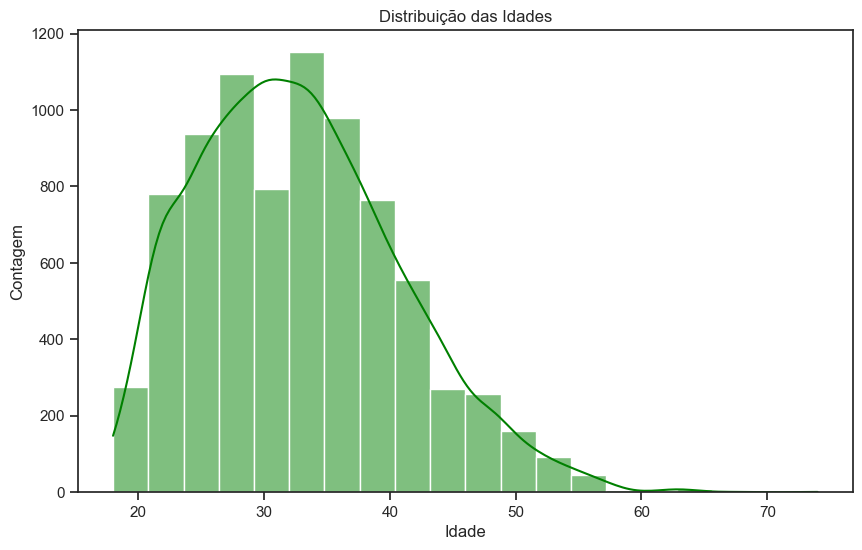

In [31]:
# Configurar o estilo do Seaborn para remover as linhas de grade verticais
sns.set(style="whitegrid", rc={"axes.grid.axis": "y"})
# Configurar o estilo do Seaborn para remover as linhas de grade horizontais
sns.set(style="ticks", rc={"axes.grid.axis": "x"})

# Plotar o gráfico de distribuição das idades
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Idade', bins=20, kde=True, color='green')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

<p style='color:green; font-size:18px'>Observações: Notou-se uma diminuição nos funcionários acima de 45 anos, podendo impactar negativamente a diversidade da empresa, tanto em termos de representatividade quanto de variedade de experiências e conhecimentos disponíveis.</p>

<h1 style='color:green; font-size:20px;'>Distribuição de gênero</h1>

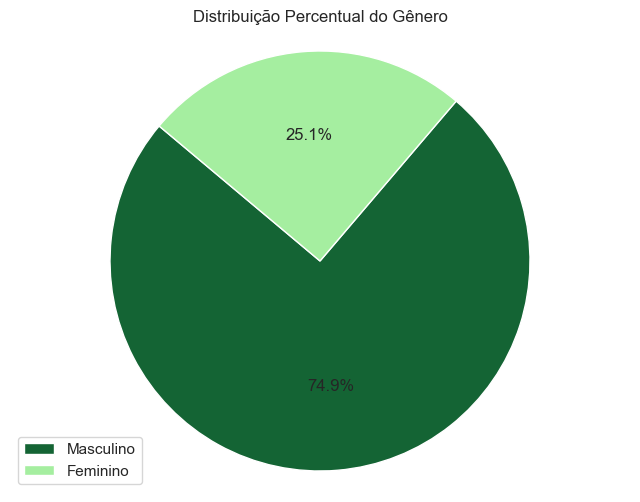

In [32]:
# Contagem de cada gênero
contagem_genero = df['Gênero'].value_counts()

# Configurar cores para o gráfico
cores = ['#146434', '#a5eea0']

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(contagem_genero, colors=cores, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual do Gênero')

# Adicionar legenda na parte inferior esquerda
plt.legend(labels=contagem_genero.index, loc='lower left')

plt.axis('equal')  # Equaliza os aspectos x e y
plt.show()

<p style='color:green; font-size:18px'>Observações: Identificamos uma distribuição desigual de trabalho com base no gênero, destacando a necessidade significativa da Corp. Solutions de aumentar sua representação feminina para alcançar seus objetivos de diversidade de cargos na empresa. </p>

<h1 style='color:green; font-size:20px;'>Distribuição das raças</h1>

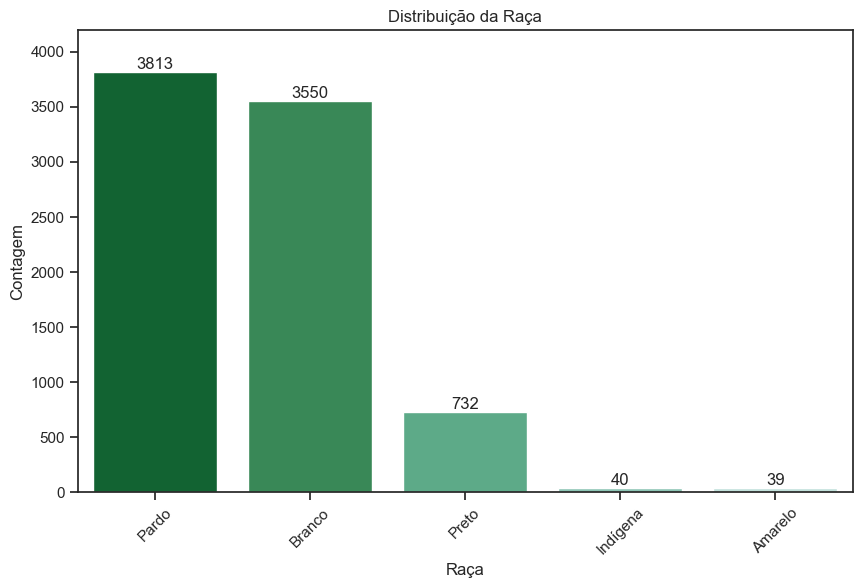

In [33]:
# Contagem de cada raça
contagem_raca = df['Raça'].value_counts()

# Plotar o gráfico de barras verticais
plt.figure(figsize=(10, 6))
grafico = sns.barplot(x=contagem_raca.index, y=contagem_raca.values, palette=sns.color_palette('BuGn_r'))
plt.legend([],[],frameon=False)
plt.title('Distribuição da Raça')
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_raca.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_raca.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

<p style='color:green; font-size:18px'>Observações: O mesmo padrão é observado em relação às vagas reservadas para pessoas pretas, indígenas e amarelas, que se enquadram em grupos étnicos diversos. Portanto, é necessário desenvolver um planejamento estratégico para aumentar a diversidade do quadro de funcionários.</p>

<h1 style='color:green; font-size:20px;'>Distribuição da formação</h1>

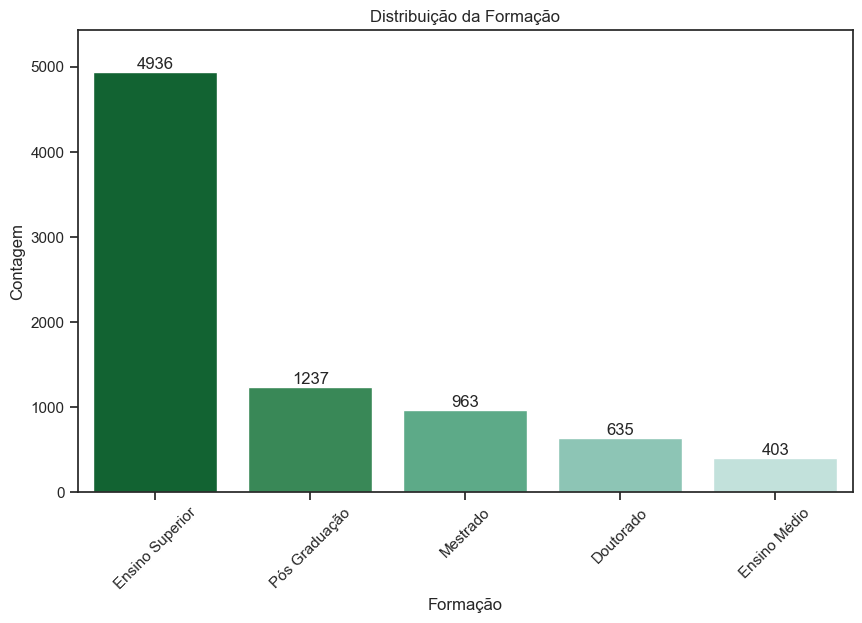

In [34]:
# Contagem de cada formação
contagem_formacao = df['Formação'].value_counts()


# Plotar o gráfico de barras verticais
plt.figure(figsize=(10, 6))
grafico = sns.barplot(x=contagem_formacao.index, y=contagem_formacao.values, palette=sns.color_palette('BuGn_r'))
plt.legend([],[],frameon=False)
plt.title('Distribuição da Formação')
plt.xlabel('Formação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_formacao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_formacao.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

<p style='color:green; font-size:18px'>Observações: A maioria das posições é ocupada por colaboradores com ensino superior, enquanto a menor parte é ocupada por colaboradores com ensino médio. Isso sugere a possibilidade de realizar uma análise sobre o impacto da desigualdade social nos cargos de nível mais elevado na empresa.</p>

<h1 style='color:green; font-size:20px;'>Distribuição por região</h1>

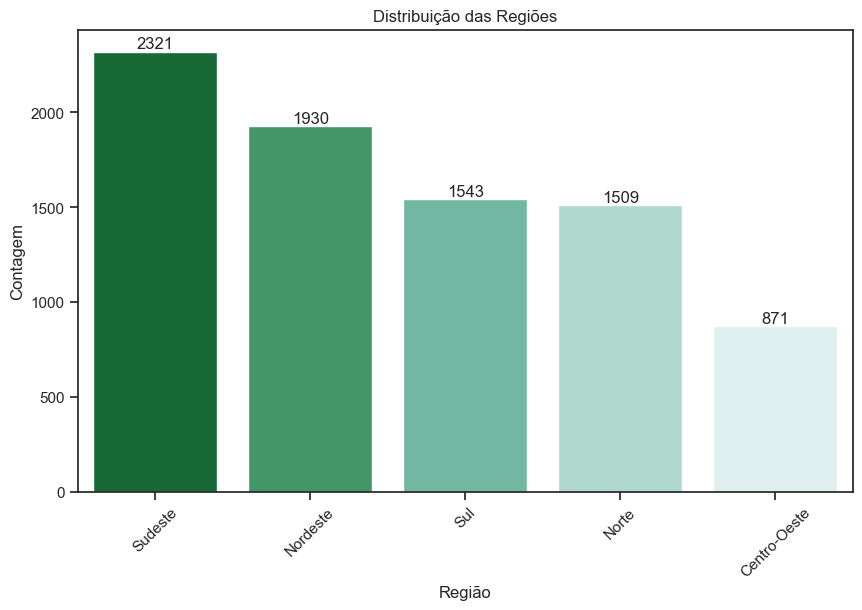

In [35]:
# Mapeamento dos estados para as regiões do Brasil
regioes = {
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
    'Centro-Oeste': ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

# Mapeamento inverso de regiões para estados
estados_por_regiao = {estado: regiao for regiao, estados in regioes.items() for estado in estados}

# Agrupar os estados por regiões
df['Região'] = df['Estado'].map(estados_por_regiao)

# Contagem de cada região
contagem_regiao = df['Região'].value_counts()

# Definindo uma paleta de cores que varia de tons de verde
paleta_cores = sns.color_palette("BuGn_r", len(contagem_regiao))

# Plotar o gráfico de barras verticais para a distribuição das regiões
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_regiao.index, y=contagem_regiao.values, palette=paleta_cores)
plt.legend([],[],frameon=False)
plt.title('Distribuição das Regiões')
plt.xlabel('Região')
plt.ylabel('Contagem')

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_regiao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

<p style='color:green; font-size:18px'>Observações:Região Centron-Oeste e Norte com baixa representatividade nas vagas da empresa. </p>

<h1 style='color:green; font-size:20px;'>Distribuição de departamento</h1>

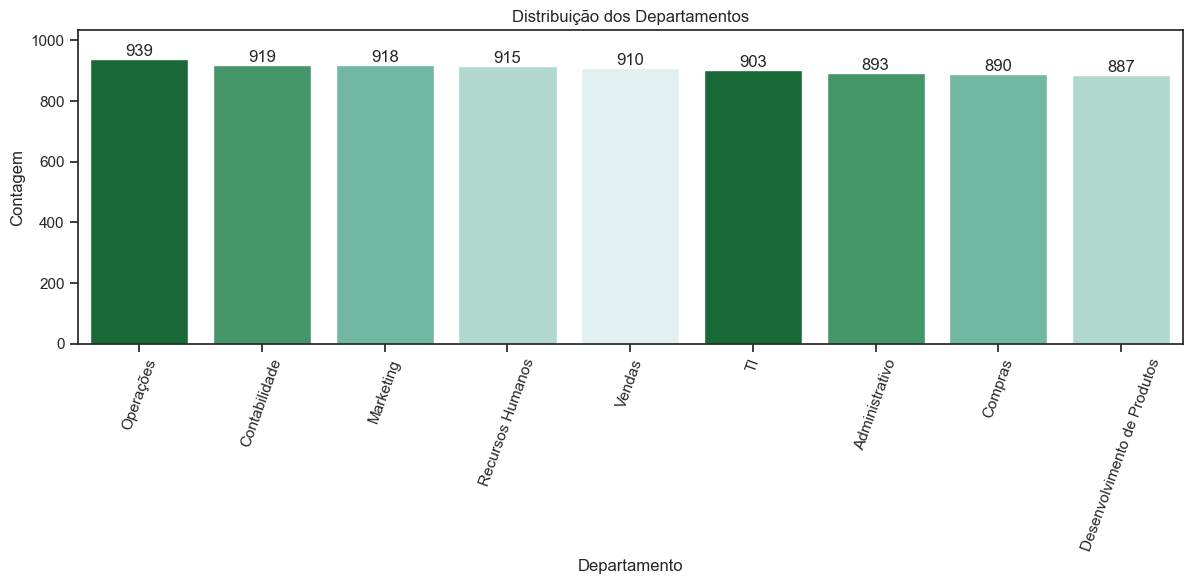

In [36]:
# Contagem de cada departamento
contagem_departamento = df['Departamento'].value_counts()


# Plotar o gráfico de barras verticais
plt.figure(figsize=(12, 6))
grafico = sns.barplot(x=contagem_departamento.index, y=contagem_departamento.values, palette=paleta_cores)
plt.legend([],[],frameon=False)
plt.title('Distribuição dos Departamentos')
plt.xlabel('Departamento')
plt.ylabel('Contagem')
plt.xticks(rotation=70, ha='center')  # Rotaciona os rótulos do eixo x verticalmente
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_departamento.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_departamento.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

<p style='color:green; font-size:18px'>Observações: Quadro de funcionario bem distribuido pelos departamentos da empresa. </p>

<h1 style='color:green; font-size:20px;'>Distribuição de senioridade</h1>

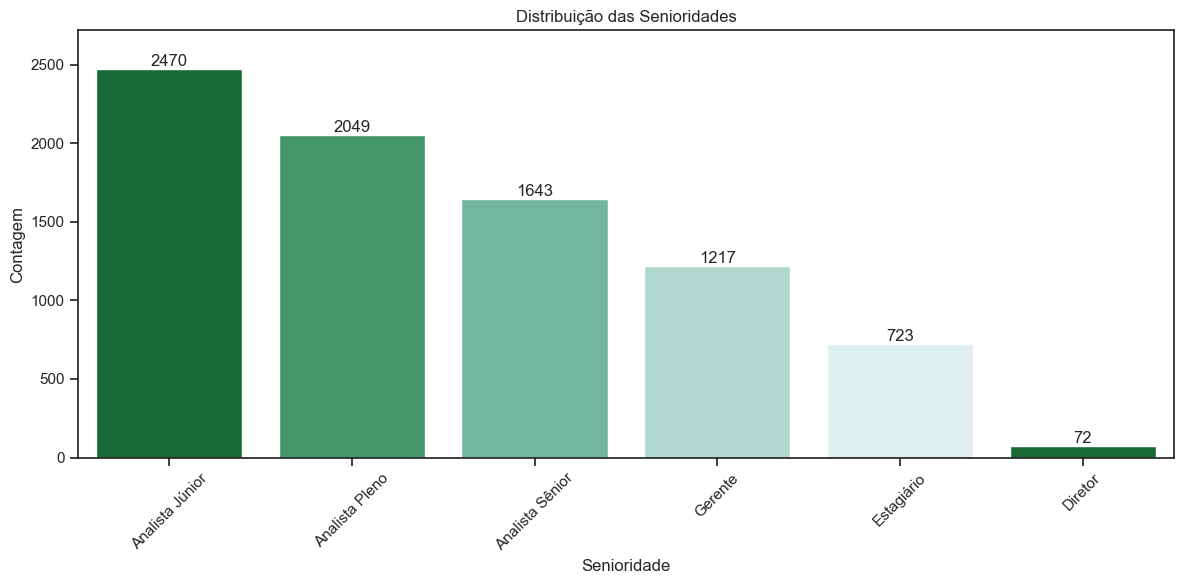

In [37]:
# Contagem de cada senioridade
contagem_senioridade = df['Senioridade'].value_counts()


# Plotar o gráfico de barras verticais
plt.figure(figsize=(12, 6))
grafico = sns.barplot(x=contagem_senioridade.index, y=contagem_senioridade.values, palette=paleta_cores)
plt.legend([],[],frameon=False)
plt.title('Distribuição das Senioridades')
plt.xlabel('Senioridade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='center')  # Rotaciona os rótulos do eixo x verticalmente
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_senioridade.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_senioridade.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

<p style='color:green; font-size:18px'>Observações: Distribuição total dos funcionaros em padrão com as necessidades da empresa.</p>

<h1 style='color:green; font-size:20px;'>Pirâmide Etária</h1>

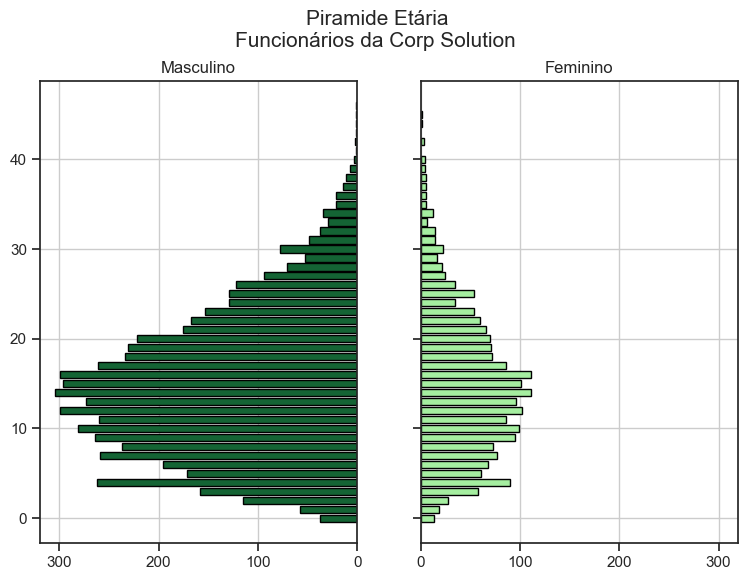

In [38]:
# separando o dataset em homens e mulheres
funcionarios_F = df[df['Gênero'] == 'Feminino']
funcionarios_M = df[df['Gênero'] == 'Masculino']

#separando por faixa Etária
funcionarios_F_idade = funcionarios_F["Idade"].value_counts()
funcionarios_M_idade = funcionarios_M["Idade"].value_counts()

funcionarios_F_idade = funcionarios_F_idade.to_frame() # convertendo a série em df
funcionarios_M_idade = funcionarios_M_idade.to_frame() # convertendo a série em df

#add name index
funcionarios_F_idade.index.name = 'Age'
funcionarios_M_idade.index.name = 'Age'

funcionarios_F_idade.reset_index(inplace=True)
funcionarios_M_idade.reset_index(inplace=True)

funcionarios_F_idade.rename(columns={'Age': 'Idade', 'count': 'Feminino'}, inplace=True)
funcionarios_M_idade.rename(columns={'Age': 'Idade', 'count': 'Masculino'}, inplace=True)

funcionarios_F_idade = funcionarios_F_idade.sort_values(by='Idade')
funcionarios_M_idade = funcionarios_M_idade.sort_values(by='Idade')

fx_etaria = funcionarios_M_idade.join(funcionarios_F_idade["Feminino"])

y = range(0, len(fx_etaria))
x_male = fx_etaria['Masculino']
x_female = fx_etaria['Feminino']

x_max = max(x_female.max(),x_male.max())*1.05 #x_max é um pouco maior que o valor mais alto
#ambos os gráficos com a mesma escala

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6)) #subplot com dois gráficos, cada um em uma coluna

#specify background color and plot title
#fig.patch.set_facecolor('xkcd:white') #muda cor do fundo
plt.figtext(.5,.9,"Piramide Etária\nFuncionários da Corp Solution \n", fontsize=15, ha='center')

#construindo os gráficos
# axes[0] -> gráfico da esqueda (masculino)
axes[0].barh(y, x_male, align='center', color='#146434',edgecolor = 'black')
axes[0].set(title='Masculino')
axes[0].set_xlim([0, x_max])

#axes[1] -> grafico da direita (feminino)
axes[1].barh(y, x_female, align='center', color='#a5eea0',edgecolor = 'black')
axes[1].set(title='Feminino')
axes[1].set_xlim([0, x_max])

#adjust grid parameters and specify labels for y-axis
axes[0].grid() #inserindo o grid
axes[0].set_axisbelow(True) #colocando o grid atrás das barras
#axes[0].set(yticks=y, yticklabels=fx_etaria['Faixa Etária']) #posição das linhas do grid
axes[0].invert_xaxis() #invertendo o primeiro gráfico para ficar espelhado
axes[1].grid() #inserindo o grid
axes[1].set_axisbelow(True) #colocando o grid atrás das barras

<h1 style='color:green; font-size:20px;'>Métricas das variáveis Tempo de Casa e Idade</h1>

In [39]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.drop(columns=['ID'],inplace=True)

metricas = {}

# Loop sobre as colunas do DataFrame
for coluna in df_numeric.columns:
    metricas[coluna] = {
        "Média": df[coluna].mean(),
        "Desvio padrão": df[coluna].std(),
        "Mínimo": df[coluna].min(),
        "Q1": df[coluna].quantile(0.25),
        "Mediana": df[coluna].median(),
        "Q3": df[coluna].quantile(0.75),
        "IQR": df[coluna].quantile(0.75) - df[coluna].quantile(0.25),
        "Máximo": df[coluna].max(),
        "Skewness": df[coluna].skew(),
        "Moda": df[coluna].mode()[0]
    }

df_metricas = pd.DataFrame(metricas).T
df_metricas

,Média,Desvio padrão,Mínimo,Q1,Mediana,Q3,IQR,Máximo,Skewness,Moda
Idade,32.746391,8.040970,18.0,27.0,32.0,38.0,11.0,74.0,0.532933,30.0
Tempo de Casa,5.206019,2.824424,0.0,3.0,5.0,7.0,4.0,15.0,0.214203,5.0


<h1 style='color:green; font-size:20px;'>Pirâmide Tempo de Casa</h1>

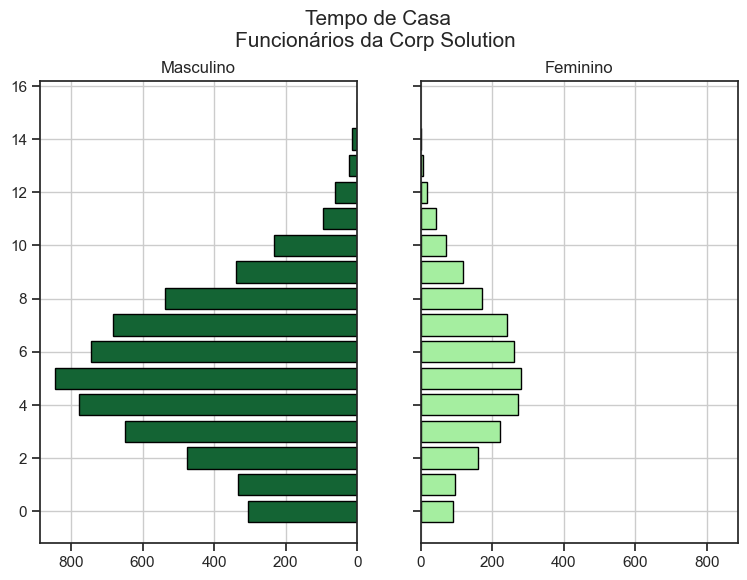

In [40]:
# separando o dataset em homens e mulheres
funcionarios_F = df[df['Gênero'] == 'Feminino']
funcionarios_M = df[df['Gênero'] == 'Masculino']

#separando por faixa Etária
funcionarios_F_idade = funcionarios_F["Tempo de Casa"].value_counts()
funcionarios_M_idade = funcionarios_M["Tempo de Casa"].value_counts()

funcionarios_F_idade = funcionarios_F_idade.to_frame() # convertendo a série em df
funcionarios_M_idade = funcionarios_M_idade.to_frame() # convertendo a série em df

#add name index
funcionarios_F_idade.index.name = 'Age'
funcionarios_M_idade.index.name = 'Age'

funcionarios_F_idade.reset_index(inplace=True)
funcionarios_M_idade.reset_index(inplace=True)

funcionarios_F_idade.rename(columns={'Age': 'Idade', 'count': 'Feminino'}, inplace=True)
funcionarios_M_idade.rename(columns={'Age': 'Idade', 'count': 'Masculino'}, inplace=True)

funcionarios_F_idade = funcionarios_F_idade.sort_values(by='Idade')
funcionarios_M_idade = funcionarios_M_idade.sort_values(by='Idade')

fx_etaria = funcionarios_M_idade.join(funcionarios_F_idade["Feminino"])

y = range(0, len(fx_etaria))
x_male = fx_etaria['Masculino']
x_female = fx_etaria['Feminino']

x_max = max(x_female.max(),x_male.max())*1.05 #x_max é um pouco maior que o valor mais alto
#ambos os gráficos com a mesma escala

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6)) #subplot com dois gráficos, cada um em uma coluna

#specify background color and plot title
#fig.patch.set_facecolor('xkcd:white') #muda cor do fundo
plt.figtext(.5,.9,"Tempo de Casa\nFuncionários da Corp Solution \n", fontsize=15, ha='center')

#construindo os gráficos
# axes[0] -> gráfico da esqueda (masculino)
axes[0].barh(y, x_male, align='center', color='#146434',edgecolor = 'black')
axes[0].set(title='Masculino')
axes[0].set_xlim([0, x_max])

#axes[1] -> grafico da direita (feminino)
axes[1].barh(y, x_female, align='center', color='#a5eea0',edgecolor = 'black')
axes[1].set(title='Feminino')
axes[1].set_xlim([0, x_max])

#adjust grid parameters and specify labels for y-axis
axes[0].grid() #inserindo o grid
axes[0].set_axisbelow(True) #colocando o grid atrás das barras
#axes[0].set(yticks=y, yticklabels=fx_etaria['Faixa Etária']) #posição das linhas do grid
axes[0].invert_xaxis() #invertendo o primeiro gráfico para ficar espelhado
axes[1].grid() #inserindo o grid
axes[1].set_axisbelow(True) #colocando o grid atrás das barras

<p style='color:green; font-size:18px'>Observações:Homens possuem mais tempo de casa, sendo assim é necessario uma analise para saber se o ambiente de trabalho é propenso a diversidade em relação as funcionarias do gênero feminino.</p>

<h1 style='color:green; font-size:20px;'>Distribuição de Cargos Por Gênero</h1>

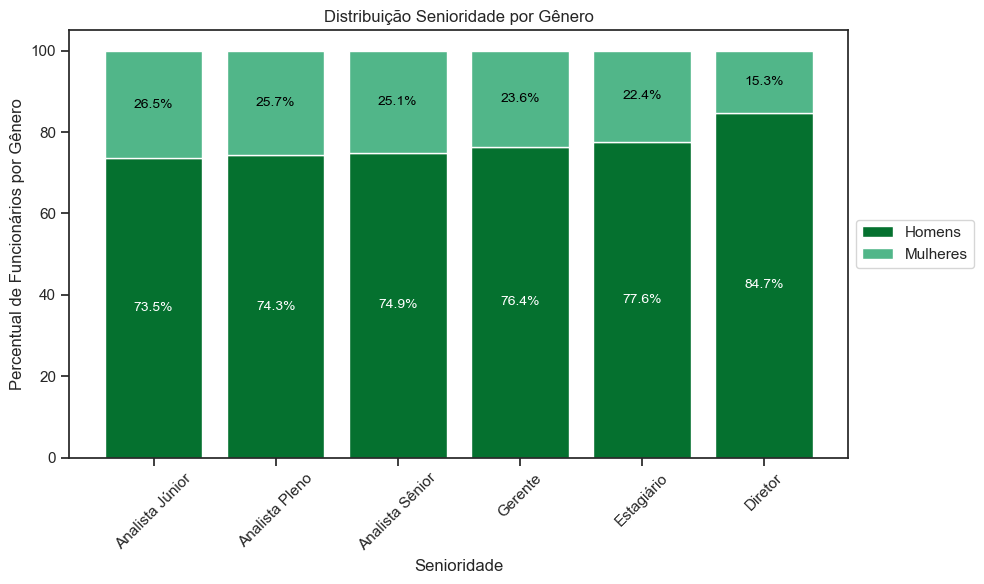

In [41]:
# Definir a paleta de cores
palette = sns.color_palette('BuGn_r')

# Seu código existente...
homens = df[df['Gênero'] == 'Masculino']
homens_por_senioridade = homens['Senioridade'].value_counts()

mulheres = df[df['Gênero'] == 'Feminino']
mulheres_por_senioridade = mulheres['Senioridade'].value_counts()

total_por_senioridade = homens_por_senioridade.add(mulheres_por_senioridade, fill_value=0)

percentuais_homens = homens_por_senioridade / total_por_senioridade * 100
percentuais_mulheres = mulheres_por_senioridade / total_por_senioridade * 100

plt.figure(figsize=(10, 6))

plt.bar(percentuais_homens.index, percentuais_homens, label='Homens', color=palette[0])

plt.bar(percentuais_mulheres.index, percentuais_mulheres, label='Mulheres', bottom=percentuais_homens, color=palette[2])

for idx, (bar1, bar2) in enumerate(zip(percentuais_homens, percentuais_mulheres)):
    plt.text(idx, bar1 / 2, f'{bar1:.1f}%', ha='center', va='center', color='white', fontsize=10)
    plt.text(idx, bar1 + bar2 / 2, f'{bar2:.1f}%', ha='center', va='center', color='black', fontsize=10)

plt.xlabel('Senioridade')
plt.ylabel('Percentual de Funcionários por Gênero')
plt.title('Distribuição Senioridade por Gênero')
plt.xticks(rotation=45)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

<p style='color:green; font-size:18px'>Observações: A distribuição de gênero por cargos reflete a baixa diversidade da empresa, nota-se que homens são predominantemente maioria em todos os cargos.</p>

<p style='color:green; font-size:25px'>Observações finais: É necessário aumentar a diversidade de gênero e raça na empresa.</p>